In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk


In [1]:
# import sys
# print(sys.executable)

/Users/cathleen/miniconda2/bin/python


The dataset contains 3000+ tweets with 454 for Virgin America and 2884 for United. The tweets contain labeled sentiments. The object of this analysis is to use this dataset to generate label prediction that can be used for other future tweets.

In [42]:
sentdata = pd.read_csv('data/train.csv')
sentdata.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,Tr_tweet_6,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0.0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,Tr_tweet_7,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0.0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,Tr_tweet_8,positive,0.6559,NaN,NaN,Virgin America,dhepburn,0.0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
8,Tr_tweet_9,positive,1.0000,NaN,NaN,Virgin America,YupitsTate,0.0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
9,Tr_tweet_10,positive,1.0000,NaN,NaN,Virgin America,HyperCamiLax,0.0,@VirginAmerica I &lt,NaN,2015-02-24 10:30:40 -0800,NYC


airlines airline
United            2884
Virgin America     454
Name: tweet_id, dtype: int64
tweet nmber 3339
Sentiment Distribution


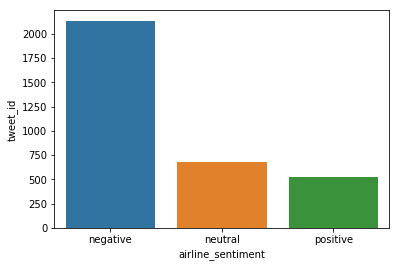

In [3]:
# Summary of data 
def createSummary(data):
    pd.unique(sentdata['airline'])
    airlines = data.groupby('airline').count()['tweet_id']
    print('airlines %s' % str(airlines))
    num_tweets = data.shape[0]
    print('tweet nmber %s' % str(num_tweets))

    
def sentimentDistribution(data):
    print('Sentiment Distribution')
    sentiment = data.groupby('airline_sentiment').count()['tweet_id'].reset_index()
    g = sns.barplot(x = 'airline_sentiment', y = 'tweet_id', data = sentiment)


    
createSummary(sentdata)
sentimentDistribution(sentdata)

In [105]:
from nltk.corpus  import stopwords
# tfidf = TfidfVectorizer(strip_accents = None, lowercase = True, preprocessor = None)


def removeStopWords(sentdata):
    # tfidf.fit_transform(['something','is', 'up', 'up']).toarray()
    stop=stopwords.words('english')
    punctuation = [',','.',';']
    print(sentdata['text'][20])
    data = sentdata['text']
            
    for p in punctuation:
        data = data.map(lambda x: x.replace('.', ''))
    print(stop)
    text=[]
    data = data.map(lambda x: ' '.join(word for word in 
                                str(x).lower().split() 
                                   if word not in set(stop) ))
    print(data[20])
    return data
#     none=sentdata['text'].map(lambda x:text.append(' '.join
#            ([word for word in str(x).lower().strip().split() if not word in set(stop)])))

sentdata['text'] = removeStopWords(sentdata)


@virginamerica guys messed seating.. reserved seating friends guys gave seat away ... 😡 want free internet
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

### TFID  Vectors

The first model predict sentiment labels (negative, neutral, and positive) on tfidf vectors. 

With this vector type, it's clear that the best classification is the Logistic Regression.
The reason could be that each column of the word feature is linearly separable and there's minimal interaction 
features, so logistic regression is able to describe features quite well. The test accuracy is ~72%.

In [106]:
# Model using tfid

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier


def createTrainTestData(sentdata):
    '''
        Transform x into features (tfidf), and y into labels, then split both
        into training and test data, default to 20% test 
    '''
    x_features = createTfidfVector(sentdata)
    y_label = sentdata['airline_sentiment'].map({'neutral':1,'negative':2,'positive':0})
    x_train, x_test, y_train, y_test  = train_test_split(x_features, y_label)
    return x_train, x_test, y_train, y_test



def createTfidfVector(sentdata):
    '''
        Create a tfidf vector for each tweet, measuring the importance of each word as  vector 
    '''
    tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
    x_features=tfid.fit_transform(sentdata['text']).toarray()
    return x_features


def modelData(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score



x_train, x_test, y_train, y_test = createTrainTestData(sentdata)

def iterateModels(x_train, x_test, y_train, y_test):
    models = {
         'logistic': LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial'),
         'lda': LDA(),
         'gradient': GradientBoostingClassifier(),
        }
    res = {}
    for m in models:
        res[m] =  modelData(models[m], x_train,  y_train, x_test, y_test)
    return res


res = iterateModels(x_train, x_test, y_train, y_test)
# {'logistic': 0.7221556886227545, 'lda': 0.6239520958083832, 'gradient': 0.7137724550898203}


/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### Avg Embedding

The second model predicts sentiment labels (negative, neutral, and positive) on an average sentence embedding. This is equivalent / similar to bag of words. The word embeddings are pretrained, from fastText. 

While logistic regression performs about the same using the avg embedding features, it improves the LDA model by 10% accuracy and the gradient boost by 3% accuracy. Using the new training embedding, the gradient boost actually outperforms logistic regression. The reason for this may be the ability for the boot model to capture interaction features in the embeddings. 

It's likely that if we use neural net approach on these embeddings, we may get even better results. 

In [144]:
# Model using average embeddings 
import fastText as ft
import os
import pickle as pk


class fastDict():

    def __init__(self, read_filename):
        # [TODO] allow dynamically init
        pickle_filename = '~/FastData/wiki.en/wiki.en.pkl'
        self.pickle_path = os.path.expanduser(pickle_filename)


    def processDict(self):
        # method = store or import
        # read pickle dictionary
        # if method = store, convert fastText data to pickle format first
        return self.loadWordDict()


    def loadWordDict(self):
        pickle_reader = open(self.pickle_path, 'rb')
        word_vec = pk.load(pickle_reader)
        return word_vec

    
    
def createSentenceAvgEmbedding(sentdata, word_dict):
    '''
        Iterate through the fasttext dictionary 
        and find pre-trained embeddings for each word 
    '''
    x_features = []
    for i, sent in sentdata.iterrows():
        sentence = sent.text.split()
        # init with a vector of length 300
        # the embedding size of fasttext
        sent_embed = [0]*300
        word_ct = 0
        for word in sentence:
            # otherwise try to add word embedding to 
            # sentence embedding
            # and add to word count
            try:
                sent_embed += word_dict[word]
                word_ct += 1
            except:
                continue
        if word_ct>0:
            avg_sent_embed = sent_embed / word_ct
        else:
            avg_sent_embed = np.array(sent_embed )
        x_features.append(avg_sent_embed)
    return x_features

def createFastEmbedding(sentdata):
    read_filename = '~/FastData/wiki.en/wiki.en.bin'
    fast = fastDict(read_filename)
    word_dict = fast.processDict()
    return createSentenceAvgEmbedding(sentdata, word_dict)



def createTrainTestEmbedding(sentdata):
    '''
    '''
    x_features = createFastEmbedding(sentdata)
    y_label = sentdata['airline_sentiment'].map({'neutral':1,'negative':2,'positive':0})
    x_train, x_test, y_train, y_test  = train_test_split(x_features, y_label)
    return x_train, x_test, y_train, y_test


def modelData(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score


def iterateModels(x_train, y_train, x_test,  y_test):
    models = {
         'logistic': LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial'),
         'lda': LDA(),
         'gradient': GradientBoostingClassifier(),
        }
    res = {}
    for m in models:
        res[m] =  modelData(models[m], x_train,  y_train, x_test, y_test)
    return res


x_train, x_test, y_train, y_test = createTrainTestEmbedding(sentdata)
logistic = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
iterateModels(x_train, y_train, x_test, y_test)
# {'logistic': 0.7269461077844311, 'lda': 0.7161676646706587, 'gradient': 0.7449101796407186}

/Users/cathleen/miniconda2/envs/seinfeld/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7269461077844311

##  Neural Net: LSTM vs CNN approach

The last approach uses the pretrained embedding layers for each word in the sequence, feeding it into  hidden layer for each sequence to generate prediction. 
The best performance is LSTM with accuracy 77%, an improvement from either of the methods 
but not significantly better than the gradient boost approach on average embeddings.

The code for this approach can be found in the model directory. 

LSTM results 
Overall accuracy: 77% 

| actual sentiment | % correct prediction |
|------------------|----------------------|
| positive  |    0.562963 |
| neutral   |  0.367089 |
| negative   |   0.940959 |


CNN results
Overall accuracy: 75% 

| actual sentiment | % correct prediction |
|------------------|----------------------|
| positive  |    0.561538|
| neutral   |     0.404372 |
| negative   |    0.919540 |


The CNN approach, when well-specified, creates somewhat similar outcome. LSTM is still the best performing, but this might change with further parameter tuning. Interestingly, though worse at predicting negative tweets, the CNN model is much better at predicting neutral tweets. 

Examples of sentences LSTM misclassified neutral sentiment tweets: 
"united rebooting chicago dispatch system need pivotalcf as i'm tired of sitting on planes"
Both CNN and LSTM misclassified this as negative, and could be arguably negative 
The word waiting and luggage may be associated with negative emotions more. 

"united it is possible to make a ticket change via twitter traveling internationally and can't make calls thanks in advance" 
LSTM believes this is a positive tweet, perhaps due to the polite "thanks", but CNN recognize that this is netural 


Examples of sentences CNN misclassified negative sentiment tweets: 


"united i would like to know what is the easiest way to get a refund." 
CNN thought this was a neutral tweet, probably because it seems to be information seeking, i.e. I would like to know.. whereas LSTM may have indexed more on the word refund. 

"united uh i booked it through the ua website why the price change"
Both CNN And LSTM thought this tweet was neutral, likely because the sentence is composed of words related to logistics, with the exception of uh. 